In [8]:
import tensorflow as tf
import keras
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
import matplotlib as mpl
import vec
from vec import Vec
from vecutil import vec2list
from sympy import Matrix

In [2]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    return model

In [9]:
def plot_train_vs_validation_loss(history, start, end):
    import matplotlib.pyplot as plt
    history_dict = history.history
    loss = history_dict['loss']
    loss = loss[start:end]
    validation_loss = history_dict['val_loss']
    validation_loss = validation_loss[start:end]
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, "yo", label="Training loss")
    plt.plot(epochs, validation_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def plot_train_vs_validation_accuracy(history, start, end):
    import matplotlib.pyplot as plt
    history_dict = history.history
    acc = history_dict['accuracy']
    acc = acc[start:end]
    val_acc = history_dict['val_accuracy']
    val_acc = val_acc[start:end]
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "go", label="Training Accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [4]:
# %load efficient_cancer_data.py
# Copyright 2013 Philip N. Klein

def read_training_data(fname, D=None):
    """Given a file in appropriate format, and given a set D of features,
    returns the pair (A, b) consisting of
    a P-by-D matrix A and a P-vector b,
    where P is a set of patient identification integers (IDs).

    For each patient ID p,
      - row p of A is the D-vector describing patient p's tissue sample,
      - entry p of b is +1 if patient p's tissue is malignant, and -1 if it is benign.

    The set D of features must be a subset of the features in the data (see text).
    """
    file = open(fname)
    params = ["radius", "texture", "perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension"];
    stats = ["(mean)", "(stderr)", "(worst)"]
    feature_labels = set([y+x for x in stats for y in params])
    feature_map = {params[i]+stats[j]:j*len(params)+i for i in range(len(params)) for j in range(len(stats))}
    if D is None: D = feature_labels
    feature_vectors = {}
    #patient_diagnoses = {}
    A = []
    b = []
    for line in file:
        row = line.split(",")
        patient_ID = int(row[0])
        b.append(-1) if row[1] == 'B' else b.append(1)
        feature_vectors[patient_ID] = Vec(D, {f:float(row[feature_map[f]+2]) for f in D})
        A.append(vec2list(feature_vectors[patient_ID]))
    return Matrix(A), Matrix(b)
        

In [14]:
train_data, train_labels=read_training_data('train.data')
test_data, test_labels=read_training_data('validate.data')

# replace -1 with 0 in labels for sigmoid preparation
train_labels = [label if label == 1 else 0 for label in train_labels]
test_labels = [label if label == 1 else 0 for label in test_labels]

train_data = np.array(train_data).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)

test_data = np.array(test_data).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)

# standardize data
train_data = (train_data - train_data.mean())/train_data.std()
test_data = (test_data - test_data.mean())/test_data.std()

In [15]:
train_data.shape, test_data.shape

((300, 30), (260, 30))

In [32]:
model1 = build_model()

model1.compile(
    loss='binary_crossentropy', optimizer="adam", metrics=['accuracy']
)

history = model1.fit(
    train_data,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_data, test_labels)
)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.7787 - accuracy: 0.4375

2022-04-29 15:21:34.937499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 87ms/step - loss: 0.7043 - accuracy: 0.4333 - val_loss: 0.7250 - val_accuracy: 0.2692
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5414 - accuracy: 0.6767 - val_loss: 0.5343 - val_accuracy: 0.7885
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4235 - accuracy: 0.9067 - val_loss: 0.4362 - val_accuracy: 0.8269
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.3427 - accuracy: 0.9297

2022-04-29 15:21:35.195649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 20ms/step - loss: 0.3075 - accuracy: 0.9033 - val_loss: 0.3576 - val_accuracy: 0.8538
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2410 - accuracy: 0.9067 - val_loss: 0.3885 - val_accuracy: 0.8385
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2136 - accuracy: 0.9000 - val_loss: 0.5965 - val_accuracy: 0.7769
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.2207 - accuracy: 0.9100 - val_loss: 0.3776 - val_accuracy: 0.8538
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2087 - accuracy: 0.9100 - val_loss: 0.7022 - val_accuracy: 0.7692
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2247 - accuracy: 0.9167 - val_loss: 0.3542 - val_accuracy: 0.8654
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.2055 - accuracy: 0.9167 - val_loss: 0.4467 - val_accuracy: 0.8308
Epoch 11/100
3/3 [=============

In [38]:
model1.evaluate(train_data, train_labels)

10/10 [==============================] - 0s 5ms/step - loss: 0.1172 - accuracy: 0.9533


[0.11718402057886124, 0.9533333778381348]

In [34]:
model1.evaluate(test_data, test_labels)

9/9 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.8500


[0.3513069152832031, 0.8500000238418579]

In [35]:
model1.evaluate(test_data, test_labels)

9/9 [==============================] - 0s 5ms/step - loss: 0.3513 - accuracy: 0.8500


[0.3513069152832031, 0.8500000238418579]

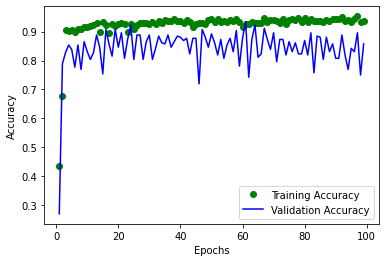

In [39]:
plot_train_vs_validation_accuracy(history,0,-1)

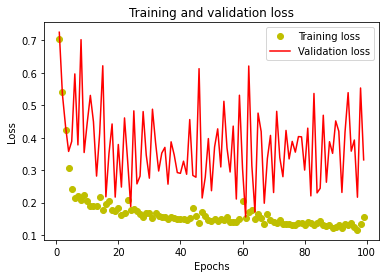

In [40]:
plot_train_vs_validation_loss(history, 0, -1)